# 06-手写代码-梯度下降

$$
y = 1/2 * (x - 0.25)^2
$$

In [1]:
def f(x):
    return 0.5*(x-0.25)**2
def h(x):
    return x-0.25

max_iter = 10000

iters = 0
learning_rate = 0.1
tol = 0.0001
x0 = 4
while iters<max_iter:
    x0 = x0 - learning_rate * h(x0)
    iters += 1
    if abs(learning_rate * h(x0))<tol:
        break

print(x0,iters)

0.25091031041886824 79


$$
y = 3 * x^2 + 5 * x + 7
$$

初始x值为:-9
随机的alpha值为:0.0110
最终结果:(-4.959184827652495, 55.98461832619363)


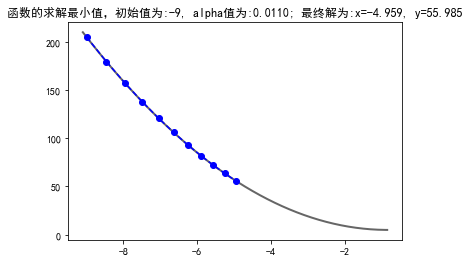

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False


def f(x):
    """原函数"""
    return 3 * (x ** 2) + 5 * x + 7


def g(x):
    """导数函数"""
    return 6 * x + 5


if __name__ == '__main__':
    # 随机一个初始值
    init_x = random.randint(-10, 10)
    x = init_x
    print("初始x值为:%d" % x)

    # 随机一个学习率
#     alpha = (random.randint(1, 999)) / 10000
    alpha = 0.0110
    
    print("随机的alpha值为:%.4f" % alpha)

    # 设置一个最大迭代次数
    max_iter = 10

    # 进行求解过程
    X = []
    Y = []
    i = 0
    y = f(x)
    X.append(x)
    Y.append(y)
    y_change = 1
    while y_change > 1e-10 and i < max_iter:
        # 进行梯度下降求解
        x -= alpha * g(x)
        pre_y, y = y, f(x)
        y_change = np.abs(pre_y - y)
        i += 1
        X.append(x)
        Y.append(y)

    # 结果输出
    print("最终结果:", end="")
    print((x, y))

    # 画图
    min_x, max_x = np.min(X), np.max(X)
    dist = np.max([np.abs(min_x - x), np.abs(max_x - x)]) + 0.1
    min_x = x - dist
    max_x = x + dist
    X2 = np.arange(min_x, max_x, 0.05)
    Y2 = list(map(lambda t: f(t), X2))
    plt.plot(X2, Y2, '-', color='#666666', linewidth=2)
    plt.plot(X, Y, 'bo--')
    plt.title("函数的求解最小值，初始值为:%d, alpha值为:%.4f; 最终解为:x=%.3f, y=%.3f" % (init_x, alpha, x, y))
    plt.show()

$$
y = x_1^2 + x_2^2
$$

初始x1值为:-8; 初始x2值为:10
随机的alpha值为:0.0149
最终结果:(-0.38834437234217906, 0.4854304654277246, 0.3864540882952183)


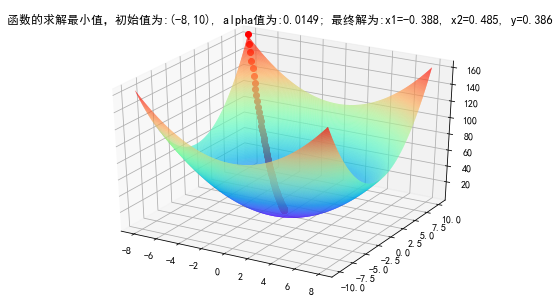

In [8]:
%matplotlib inline
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False


def f(x1, x2):
    """原函数"""
    return x1 ** 2 + x2 ** 2


def g_x1(x1):
    """对原函数的x1求导数函数(偏导函数)"""
    return 2 * x1


def g_x2(x2):
    """对原函数的x2求导数函数(偏导函数)"""
    return 2 * x2


if __name__ == '__main__':
    # 随机一个初始值
    init_x1 = random.randint(-10, 10)
    init_x2 = random.randint(-10, 10)
    x1 = init_x1
    x2 = init_x2
    print("初始x1值为:%d; 初始x2值为:%d" % (x1, x2))

    # 随机一个学习率
    alpha = (random.randint(1, 999)) / 10000
    print("随机的alpha值为:%.4f" % alpha)

    # 设置一个最大迭代次数
    max_iter = 100

    # 进行求解过程
    X1 = []
    X2 = []
    Y = []
    i = 0
    y = f(x1, x2)
    X1.append(x1)
    X2.append(x2)
    Y.append(y)
    y_change = 1
    while y_change > 1e-10 and i < max_iter:
        # 进行梯度下降求解
        x1 -= alpha * g_x1(x1)
        x2 -= alpha * g_x2(x2)
        pre_y, y = y, f(x1, x2)
        y_change = np.abs(pre_y - y)
        i += 1
        X1.append(x1)
        X2.append(x2)
        Y.append(y)

    # 结果输出
    print("最终结果:", end="")
    print((x1, x2, y))

    # 画图
    max_x1 = np.max(np.abs(X1))
    max_x2 = np.max(np.abs(X2))
    X12 = np.arange(-max_x1, max_x1, 0.05)
    X22 = np.arange(-max_x2, max_x2, 0.05)
    X12, X22 = np.meshgrid(X12, X22)
    Y2 = np.array(list(map(lambda t: f(t[0], t[1]), zip(X12.flatten(), X22.flatten())))).reshape(X12.shape)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X12, X22, Y2, rstride=1, cstride=1, cmap='rainbow')
    ax.plot(X1, X2, Y, 'ro--')
    ax.set_title(
        "函数的求解最小值，初始值为:(%d,%d), alpha值为:%.4f; 最终解为:x1=%.3f, x2=%.3f, y=%.3f" % (init_x1, init_x2, alpha, x1, x2, y))
    plt.show()
